## Digit Recognition using K Nearest Neighbors (KNN) and Random Forest Classification

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
from sklearn import model_selection, neighbors, metrics 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from IPython.display import Image
digits = pd.read_csv ("../datasets/train.csv")
test = pd.read_csv ("../datasets/test.csv")

## 1.0 KNN Classifier 

## 1.1 First step is to prepare the data

In [2]:
#Separate out the outcome variable
y=digits.label

#Drop the label column
X=digits.drop(['label'], axis=1)

#Create a subset of the training data set to tune the hyperparameters
digits_reduced=digits.sample(frac=0.25, replace=False)

#Separate out the label column from the downsized training dataset
y_reduced=digits_reduced.label
X_reduced=digits_reduced.drop(['label'], axis=1)

## 1.2 Tune the KNN classifier hyperparameters with grid search

In [3]:
params={'n_neighbors': list (range(1,10)), 'weights':['distance']}
kf = model_selection.KFold(n_splits=5, shuffle=True)
gs = GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params, n_jobs=-1,
cv = kf.split(X_reduced,y_reduced)
)
gs.fit(X_reduced,y_reduced)
print (gs.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


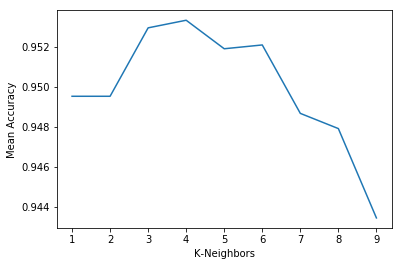

In [32]:
k = range(1, 10)
plt.plot(k,[s[1] for s in  gs.grid_scores_],)
plt.ylabel("Mean Accuracy")
plt.xlabel("K-Neighbors")

## 1.3 Train the KNN classifier with the training dataset

In [41]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20)
knn = neighbors.KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print (knn.score(X_test, y_test))

0.970357142857


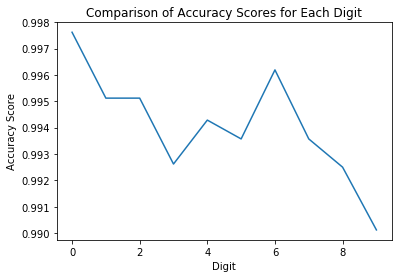

In [42]:
scores_list=[]
for d in range(0,10):
    y_true=(y_test==d)
    y_pred=(pred==d)
    Score=accuracy_score(y_true,y_pred)
    scores_list.append(Score)
plt.plot(list(range(0,10)), scores_list)
plt.ylabel("Accuracy Score")
plt.xlabel("Digit")
plt.title("Comparison of Accuracy Scores for Each Digit")

## 1.4 Run the model on the test dataset

In [19]:
predictions=knn.predict(test)

In [ ]:
print (knn.predict(test))

In [ ]:
plt.imshow(test_1[2].reshape((28, 28)))

In [ ]:
out_file = open("predictions.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()

## 1.5 The Results

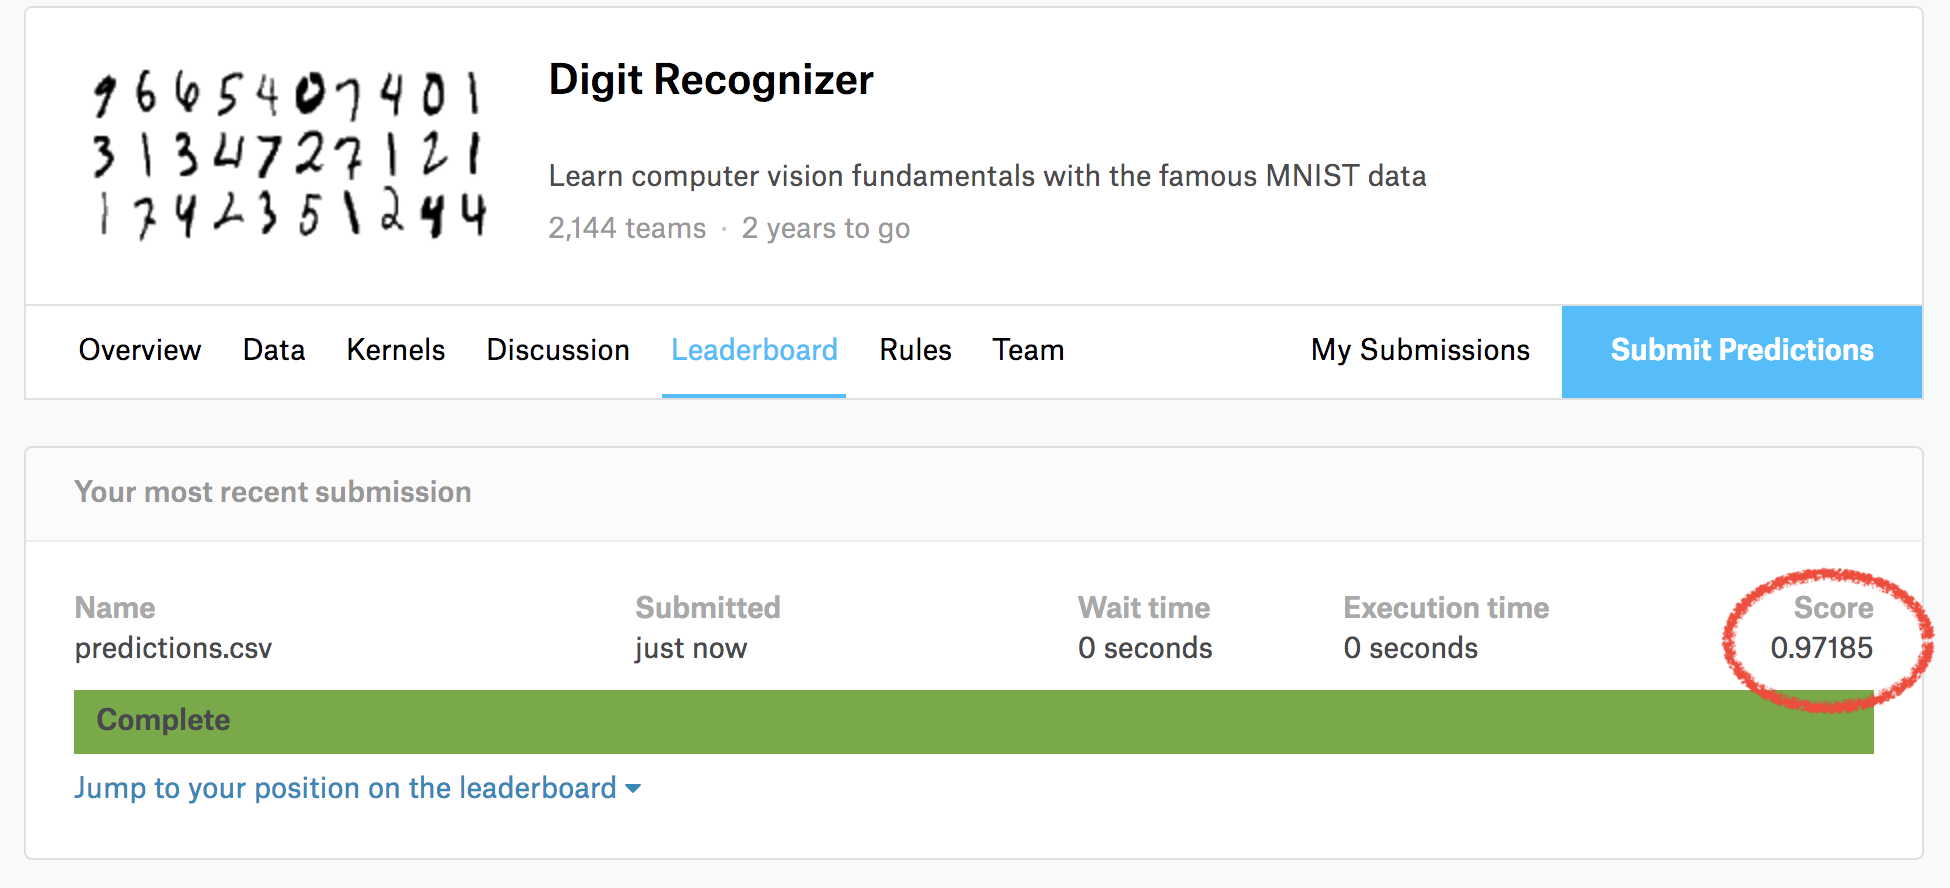

In [20]:
Image(filename='Screenshot_Digit_Recognition_Results.png') 

## 2.0 Random Forest Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

#Reduce the training dataset for tuning the hyperparameters
digits_reduced=digits.sample(frac=0.25, replace=False)

#Separate out the label column from the downsized training dataset
y_reduced=digits_reduced.label
digits_reduced_1=digits_reduced.drop(['label'], axis=1)
#Convert the downsized training dataset into an array
digits_reduced_2=np.array(digits_reduced_1)

## 2.1 Tune the Random Forest classifier hyperparameters with grid search

In [21]:
tuned_parameters = [{'n_estimators': list (range(10,100)), 'max_features':['auto'] + list(np.arange(0.25, 0.5, 0.05))}]

clf = GridSearchCV(ExtraTreesClassifier(), tuned_parameters, cv=5, n_jobs=-1)
clf.fit(X_reduced, y_reduced)
print(clf.best_params_)
print(clf.best_estimator_)

{'max_features': 0.25, 'n_estimators': 98}
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=98, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


## 2.2 Train the model on the full training dataset

In [24]:
et = ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=0.25, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=98, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
et.fit(X_train, y_train)
pred_et=et.predict(X_test)
accuracy_score(y_test,pred_et)

0.97035714285714281

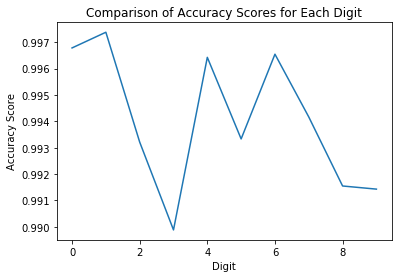

In [40]:
scores_et_list=[]
for d in range(0,10):
    y_true=(y_test==d)
    y_pred=(pred_et==d)
    Score=accuracy_score(y_true,y_pred)
    scores_et_list.append(Score)
plt.plot(list(range(0,10)), scores_et_list)
plt.ylabel("Accuracy Score")
plt.xlabel("Digit")
plt.title("Comparison of Accuracy Scores for Each Digit")

## 2.3 Run the model on the test dataset

In [25]:
predictions_et = et.predict(test)

In [26]:
out_file = open("predictions_Extra_Trees_.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions_et)):
    out_file.write(str(i+1) + "," + str(int(predictions_et[i])) + "\n")
out_file.close()

## 2.4 The Results

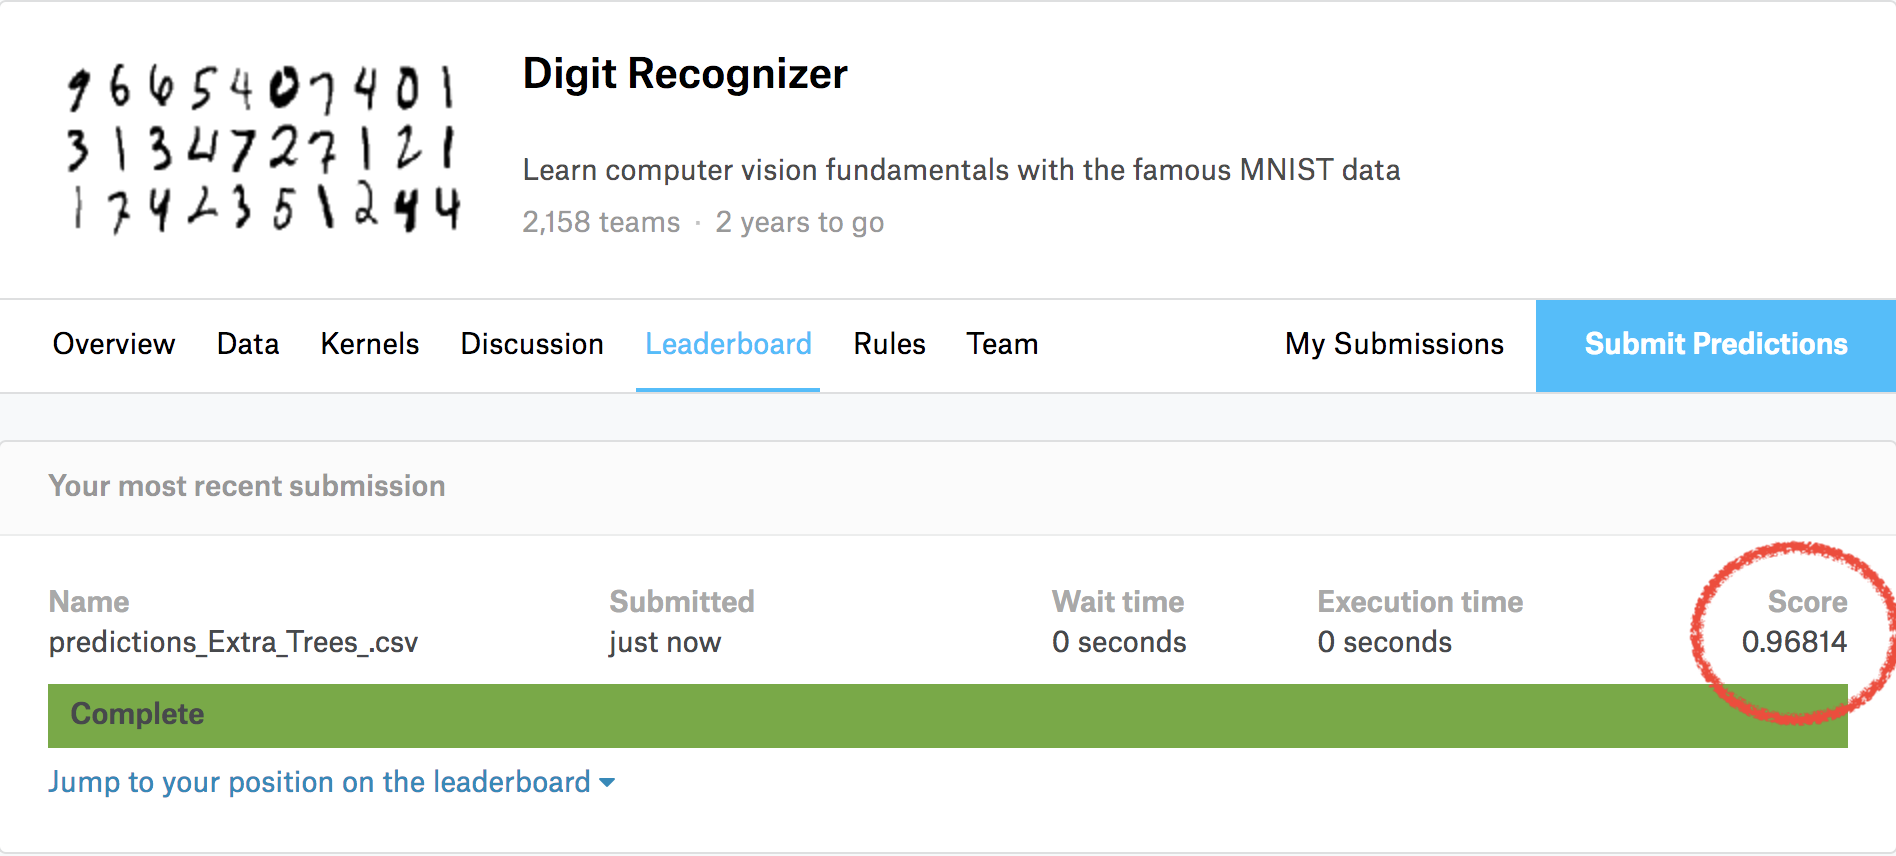

In [30]:
Image(filename='Extra_Trees_Results.png')